SEABORN PACKAGE

Seaborn is a Python data visualization library based on matplotlib.
It provides a high-level interface for drawing attractive and informative statistical graphics.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

In [3]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2022-05-16 14:18:17--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2022-05-16 14:18:17--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [7]:
pubchem_data = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
print("Pubchem data:")
print(pubchem_data)

Pubchem data:
      PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           0           0           0           0   
4              1           1           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4690           1           1           1           1           0           0   
4691           1           1           1           1           0           0   
4692           1           1           1           1           0           0   
4693           1           1           1           1           0           0   
4694           1           1           1           1           0           0   

      PubchemFP6  Pubchem

In [8]:
X_axis = pubchem_data.drop('pIC50', axis=1)
print(X_axis)

      PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           0           0           0           0   
4              1           1           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4690           1           1           1           1           0           0   
4691           1           1           1           1           0           0   
4692           1           1           1           1           0           0   
4693           1           1           1           1           0           0   
4694           1           1           1           1           0           0   

      PubchemFP6  PubchemFP7  PubchemFP

In [9]:
Y_axis = pubchem_data.pIC50
print(Y_axis)

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64


In [12]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X_axis = selection.fit_transform(X_axis)
print("Low varience removed X features")
print(X_axis)

Low varience removed X features
[[0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 0]]


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_axis, Y_axis, test_size=0.2)

In [15]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5403863922059543

In [16]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

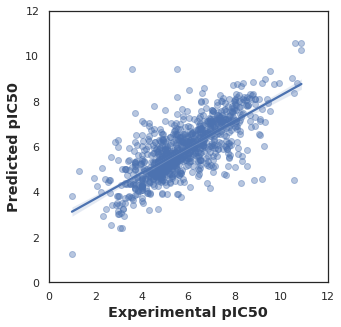

In [22]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show